## Discussion Releted With Outliers And Impact On Machine Learning

##### Which ML models are sensitive to outliers?
1. Naivye Bayes Classifier--- Not Sensitive to Outliers 
2. SVM--- Not Sensitive to Outliers(sensitive means impact)
3. Linear Regression--- Sensitive to outliers
4. Logistic Regression--- Sensitive to outliers
5. Decision Tree Classification or Regression--- Not Sensitive
6. Ensamble(RF,XGboost,GB)--- Not Sensitive
7. kNN--- Not Sensitive
8. Kmeans--- Sensitive
9. Hierarichal--- Sensitive
10. PCA--- Sensitive
11. Neural Network--- Sensitive

In [3]:
import pandas as pd
df = pd.read_csv('titanic_data.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df['age'].isnull().sum()

263

C:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

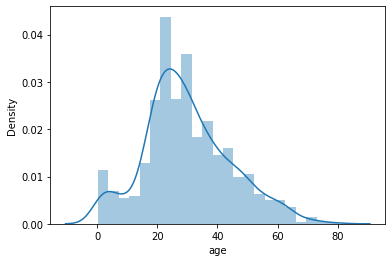

In [8]:
import seaborn as sns
sns.distplot(df['age'].dropna())

C:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

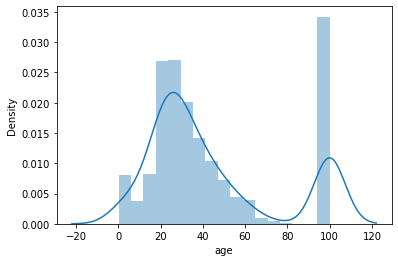

In [6]:
sns.distplot(df['age'].fillna(100))

#### Gaussian Distribution

Text(0, 0.5, 'No of passanger')

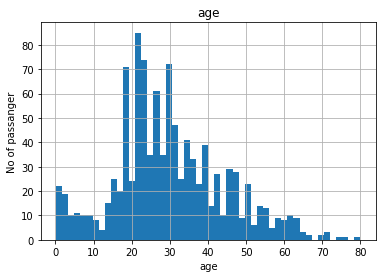

In [9]:
fig = df.age.hist(bins=50)
fig.set_title('age')
fig.set_xlabel('age')
fig.set_ylabel('No of passanger')

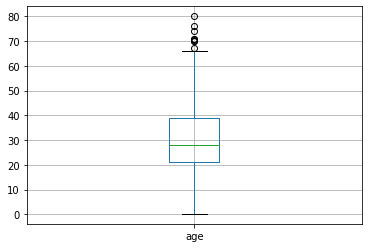

In [10]:
fig = df.boxplot(column='age')

In [11]:
df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

#### Assuming age follows a Gaussian Distribution we will calculate the boundries which differenciate the outliers

In [14]:
df['age'].std()

14.413499699923602

In [15]:
df['age'].mean()

29.8811345124283

In [13]:
df['age'].mean() + 3 *df['age'].std()

73.1216336121991

In [17]:
#### Let's compute the imterquantile range to calculate the boundaries
IQR = df.age.quantile(0.75)-df.age.quantile(0.25)

In [18]:
IQR

18.0

In [20]:
### Extreme Outliers
lower_bridge = df['age'].quantile(0.25)-(IQR*3)
upper_bridge = df['age'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-33.0
93.0


(None, None)

### Feature is Skewed

Text(0, 0.5, 'No of passanger')

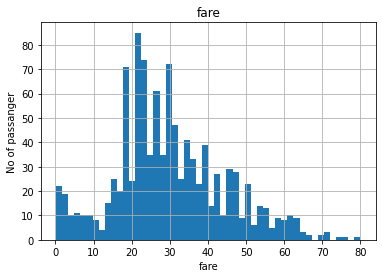

In [22]:
fig = df.age.hist(bins=50)
fig.set_title('fare')
fig.set_xlabel('fare')
fig.set_ylabel('No of passanger')

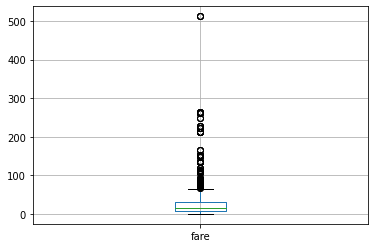

In [23]:
fig = df.boxplot(column='fare')

In [24]:
df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [29]:
IQR = df.fare.quantile(0.75)-df.fare.quantile(0.25)
IQR

23.379199999999997

In [32]:
lower_bridge = df['age'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-14.068799999999996
74.0688


(None, None)

In [33]:
lower_bridge = df['fare'].quantile(0.25)-(IQR*3)
upper_bridge = df['fare'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-62.24179999999999
101.4126


(None, None)